# Introduction

Let's take a look at our 1st experiment where we can measure a result with an analysis of variance and we'll start with a common experiment that you may have even done yourself. 

A website AB test. 

An AB test has visitors who come to a website and some are exposed to one version of the site and others are exposed to another version (hence the A/B term).

We're going to analyze this as an experiment although obviously such an experiment doesn't take place in a lab as we might think of most experiments doing, but out there in the wild on the web. 

So here's the scenario we'll work with. First, we'll talk about the design consideration of this experiment. Talk about some of the considerations when we're running the experiment and then we'll move as we've done before to the code and show how we would analyze this experiment statistically, and report the results. 

Here's the scenario - 

Let's say on a given day, 500 visitors to a website are treated as part of the experiment. Perhaps the first 500 visit the website on that designated day and let's say half of them are exposed to website A. And half of them are exposed to a variation of it, website B. 

Now that may not be the optimal way to run an AB test. Perhaps it shouldn't just be on one day, for example. And perhaps it should be more than 500 people, or perhaps, it should be a certain number of people on a given day. All of those are good variations to consider but for now, we're just going to keep it simple and keep it to the scenario I just described. 

We're interested in which website version causes people to view the most number of distinct pages. 

So maybe we think that a redesign of a website, say version B of this site, will have people stay on the site longer and view more pages. So distinct pages viewed will be our measure and you could imagine in a real world AB test, we might also count time on site and perhaps page loads or page views total, and other types of factors like that. Maybe even clicks and things. So we're interested in the number of distinct pages that they view. 

Let's talk through some design considerations in this experiment. First of all, let's think in terms of our variables. Just want to introduce the notion of independent variables and dependent variables. 

Independent variables are things we are manipulating. That's why they are independent. We're controlling them. So what's our independent variable in this simple website AB test? It would be which version of the site they encounter (A or B). 

Dependent variables are things that result from our manipulation or sometimes called our treatment (which would be the site they're exposed to). The dependent variable is really the measure and as I said before, we're interested in the number of distinct pages that are viewed so we can call that pages. 


The idea here would be the number of pages viewed we thinkg might depend on the value that x takes. Is x website A or B? (plus measurement error). 

You might ask "why is there any measurement error?". We know how many distinct pages they visit on the website. That's true. In that case, we know the measurement of page count presumably without error. Although there could be perhaps some error in our code that's logging that, or maybe some edge case that's not handled or something, but that's not just what measurement error is. 

Measurement error in this term is also considering the variation that naturally takes place when we measure things. So it doesn't have to be that we're logging it wrong. It could be that if I measured the same person on Tuesday and then measured them again on Wednesday, they may in fact have a different result. If I measured 2 different people, they may have a different result. Due purely to the fact that they're different people, not because the website is causing that. These errors are taken to be kind of random and usually normally distributed, and they are part of any experiment, any measurement. In fact, we don't know how much error may be in a measurement. How many variation maybe, natural variation, and that's why we need to have a statistical power to draw inferences over the population that we're after. Meaning, we want to know...is there a true difference between A and B...in every single measurement in spite of the so called natural variation of any human behavior that we might be measuring. 

In our particular experimental case, we're looking at the number of distinct pages being in some relation to the site. Now, there's something else to be said about the design of this experiment as well. And that is that these variables each have types and it's important to be aware of variable types. 

What's the variable type for these pages? It is numeric or numerical or scalar or continuous (all synonums). In our customer analysis of the variance situation, we'll see some analysis where this is not the case but mostly, we'll see that our Y value will be numeric. It's a numeric outcome based on certain inputs but what are those input types? What is the type of X here? It's the site that can take on 2 values (A or B). That is called a cateogorical variable type or a nominal type. 

So we have a function that we're looking at here which is number of pages, a numeric outcome could be the result of differences in a categorical input, or independent variable. 

We won't say independent variables anymore - we'll call them factors. Certain experiments we look at in the future will have multiple factors and they'll be factorial designs. So independent variables can also be called factors and factors can take on values...just like this site has in this case (2 values). Those are called levels of the factor. So we have levels A and B for the site factor. 

There's one last consideration to take into account, and that is that these factors can also be between subjects or within subjects. Well, what does that mean?

Between Subjects factor is one for which only each subject experiences only 1 value or level of that facotor. So in our case, each subject would experience either website A or website B but not both. Within Subjects factor is one for which a participant experiences more than 1 level of the factor. In this case, it would be both website A and B. In a website AB test, when a visitor comes to a site, they're usually issued into 1 or the other variations of the website and not both. 

So that's what a between subjects and within subjects factor is and then when we have multiple factors, we can have some of them be between subjects and some of them be within subjects. To be a within subject facot, you only need to be exposed to more than one level of the factor. So if we had A, B, C, and D versions of the site, if a participant was exposed to A and B but maybe not C and D, it would still be a within subjects facot. It would be a partial within subjects factor at that point. 

So these are some of the design consideration for this website AB test. What are some things to keep in mind when we run such a test? This is by no means a comphrehensive list of considerations but it is a few things that we'd want to think about. 

One question is do we measure each visitor only once? We're measuring how many distinct pages they view. What if they come back in the same day or what if they come back in a time when they're still within that group of 500 that we said we wanted? 

For that matter, how many visitors do we want? Why 500? Should be want more, fewer? That kind of depends on how big the the difference in pages visited between these website A and B versions. If the differences are great then we don't need so many subjects. If the differences are smaller, we may need more to tell the difference. Is the split 50/50? Do half the subjects get A and half get B? You can run website AB tests with any arbritrary split (90/10 or 80/20). In our case. we'll do 50/50 but it may depend on an algorithm that assigns people the conditions in a way that could get slightly unbalanced, and so that's a consideration as well. Is the design a balanced designed or an imbalanced design. Balanced designs have the same number of data points in every condition. Imbalanced designs do not. So those are some of the things to think about. 

And we do measure each visitor only once. So we have one measure per visitor, the number of distinct pages they viewed, either in A or B.

# Analysis with T-Test

In [1]:
# independent samples t-test

pgviews <- read.csv("materials/pgviews.csv")
head(pgviews)

Subject,Site,Pages
1,B,2
2,B,6
3,A,5
4,B,7
5,A,3
6,B,2


In [2]:
pgviews$Subject <- factor(pgviews$Subject)
summary(pgviews)

    Subject    Site        Pages       
 1      :  1   A:245   Min.   : 1.000  
 2      :  1   B:255   1st Qu.: 3.000  
 3      :  1           Median : 4.000  
 4      :  1           Mean   : 3.958  
 5      :  1           3rd Qu.: 5.000  
 6      :  1           Max.   :11.000  
 (Other):494                           

In [3]:
library("plyr")

In [4]:
ddply(pgviews, ~ Site, function(data) {
    summary(data$Pages)
})

Site,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.
A,1,3,3,3.404082,4,6
B,1,3,4,4.490196,6,11


In [6]:
ddply(pgviews, ~ Site, 
          summarise, 
          Pages.mean = mean(Pages), 
          Pages.sd = sd(Pages)
        )

Site,Pages.mean,Pages.sd
A,3.404082,1.038197
B,4.490196,2.127552


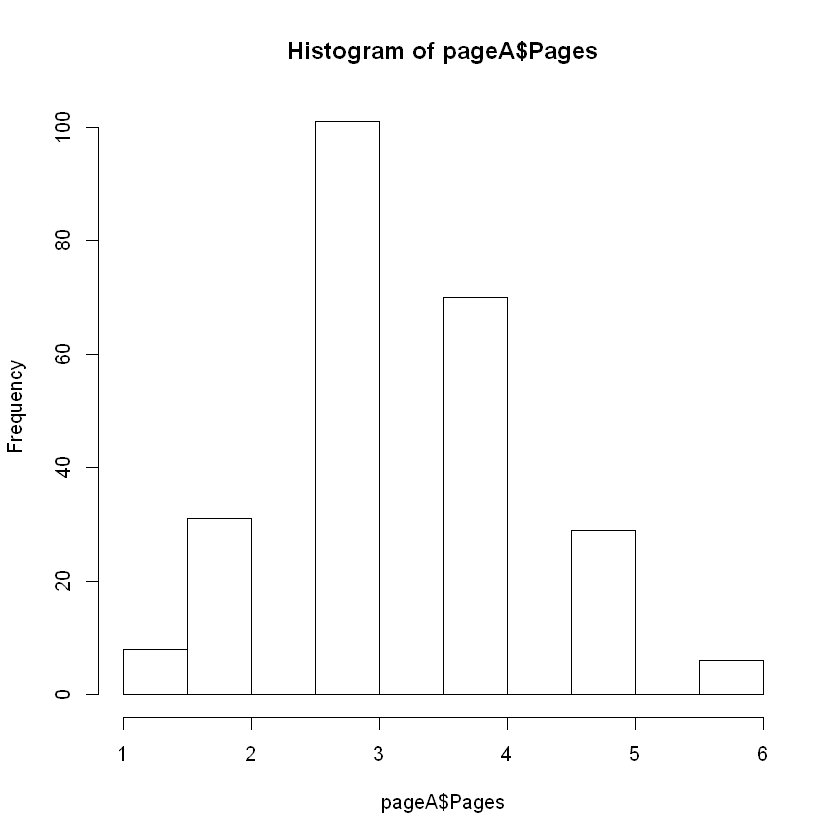

In [7]:
pageA <- pgviews[pgviews$Site == "A", ]
hist(pageA$Pages)

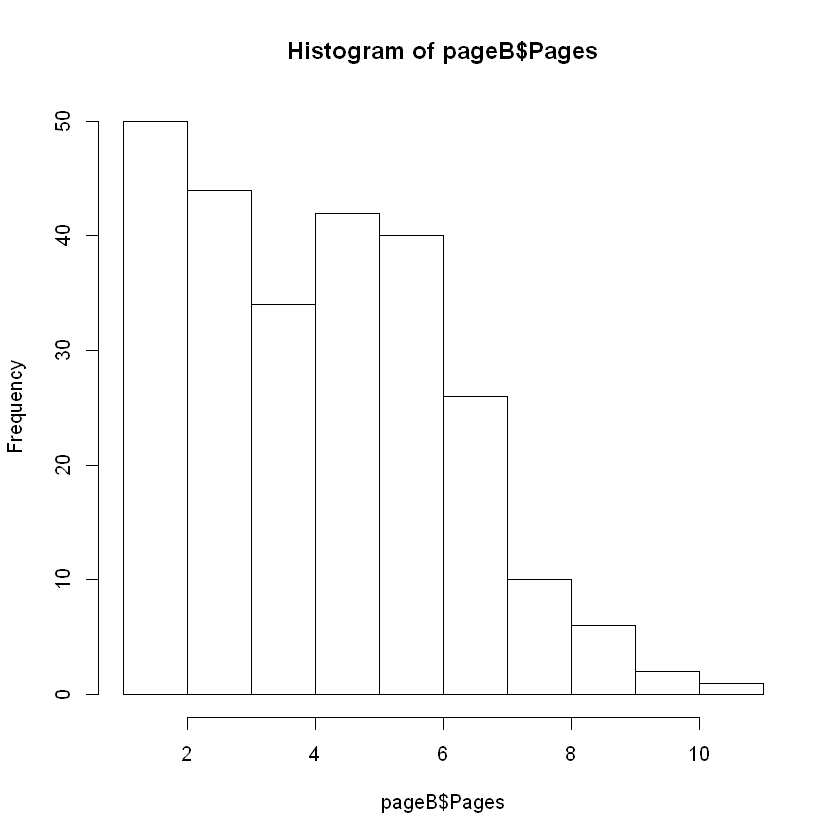

In [10]:
pageB <- pgviews[pgviews$Site == "B", ]
hist(pageB$Pages)

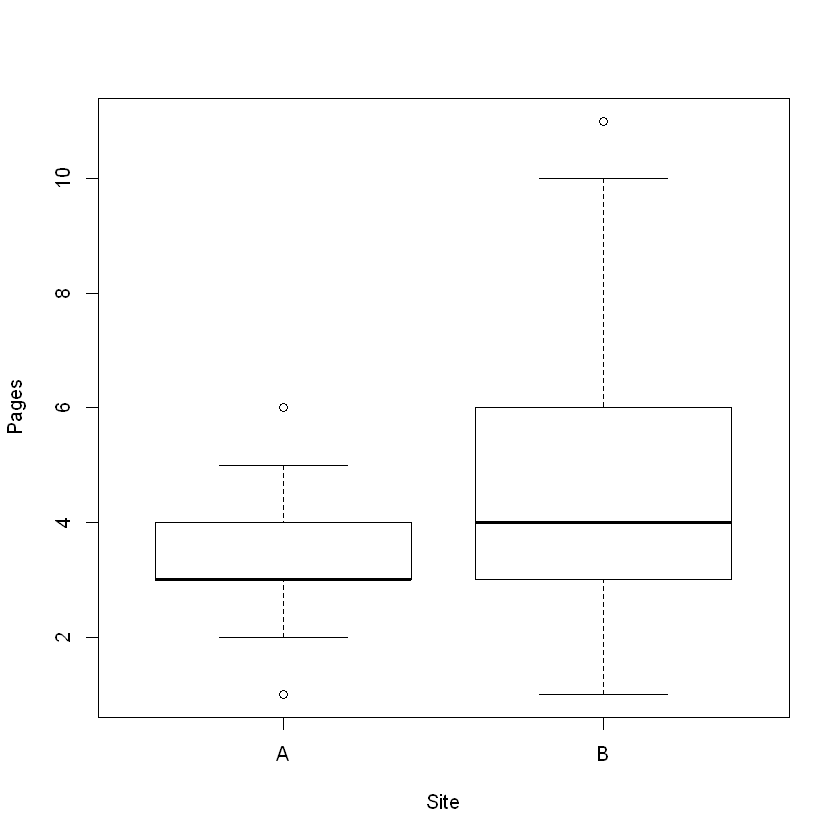

In [13]:
plot(Pages ~ Site, data=pgviews)

Remember, factors can be between subjects or within subjects. And between subjects is the type of factor that site would be, because each visitor gets either website A or B but not both. So it's an independent samples T-Test.

In [9]:
# independent-samples t-test
t.test(Pages ~ Site, data=pgviews, var.equal=TRUE)


	Two Sample t-test

data:  Pages by Site
t = -7.2083, df = 498, p-value = 2.115e-12
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.3821544 -0.7900745
sample estimates:
mean in group A mean in group B 
       3.404082        4.490196 


You can see the parameter at the end (var.equal = TRUE). That's saying the variance is equal. We can see in the boxplot that it's obviously not true and we'll formalize that consideration as we go but for now, let's do a basic incorrect T-Test assuming that the variance is equal. In reality, T-Tests are fairly robust to changes and deviations in variants. They don't have to be exactly equal anyway. 

What does the output mean? The data confirms that we're looking at pages by site and that's in fact exactly the design that we talked about. The T-Value is the T-Statistic so just like with the chi-squared statistic, the T-Statistic is the value in the t-distribution that we are getting from this data. The DF is 498. Obviously related to the 500 subjects that we have there and the p-value is very small. That's all we care about. 

We can see the mean for Group A and B are like we saw before in those summary statistics. So the bottomline here is we have a significant difference between the number of pages visited in the website condition A and B. That's the T-Test for our simple website AB test. 

And it might suggest to us that people visit because people visit more distinct pages in website B. 